## Data Science for Crime Prediction

### Linear Regression and Random Forest

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
import seaborn as sn

from numpy import percentile

py.init_notebook_mode(connected=True)

### Independent variables

#### City of Toronto Open Data and KSI TPS open data

In [63]:
data = pd.read_csv("1_open_Data\INDICATORS_final.csv")

In [166]:
data

,Neighbourhood,Hood_ID,Population,Assault_Rate_2019,AutoTheft_Rate_2019,BreakandEnter_Rate_2019,Homicide_Rate_2019,Robbery_Rate_2019,TheftOver_Rate_2019,Shape__Area,...,Robbery,Theft Over,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TPSFacilities_2km,TPSFacilities_5km,TPSFacilities_10km
0,West Humber-Clairville,1,33312,795.5,1446.9,396.3,6.0,210.1,189.1,3.014532e+07,...,550,310,170,15,6,37,950,0,1,5
1,Mount Olive-Silverstone-Jamestown,2,32954,813.3,267.0,109.2,9.1,166.9,27.3,4.637542e+06,...,462,26,52,13,103,4,1288,1,3,4
2,Thistletown-Beaumond Heights,3,10360,714.3,482.6,125.5,0.0,67.6,29.0,3.339481e+06,...,90,14,31,5,30,9,372,1,3,5
3,Rexdale-Kipling,4,10529,588.8,474.9,142.5,19.0,218.4,28.5,2.505576e+06,...,121,9,29,1,15,3,308,0,3,6
4,Elms-Old Rexdale,5,9456,708.5,296.1,105.8,0.0,148.1,42.3,2.931145e+06,...,81,9,1,4,14,2,358,0,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,West Hill,136,27392,1573.5,164.3,284.8,7.3,259.2,14.6,9.625440e+06,...,390,38,31,15,26,11,2052,1,1,4
136,Woburn,137,53485,798.4,112.2,187.0,0.0,125.3,15.0,1.233407e+07,...,501,82,161,32,26,27,2594,0,2,7
137,Eglinton East,138,22776,851.8,122.9,254.7,8.8,118.5,35.1,3.223146e+06,...,243,31,57,10,12,4,885,0,2,8
138,Scarborough Village,139,16724,1046.4,107.6,239.2,0.0,167.4,12.0,3.151015e+06,...,150,16,36,2,3,5,788,0,2,5


In [175]:
#data.to_csv("2_Output/4_mse/data_index.csv")

In [64]:
data.dtypes

Neighbourhood               object
Hood_ID                      int64
Population                   int64
Assault_Rate_2019          float64
AutoTheft_Rate_2019        float64
BreakandEnter_Rate_2019    float64
Homicide_Rate_2019         float64
Robbery_Rate_2019          float64
TheftOver_Rate_2019        float64
Shape__Area                float64
Shape__Length              float64
Assault                      int64
Auto Theft                   int64
Break and Enter              int64
Robbery                      int64
Theft Over                   int64
KSI                          int64
TotalYouthServices           int64
CommunityHousing             int64
PlacesOfWorship              int64
SocialHousing                int64
TPSFacilities_2km            int64
TPSFacilities_5km            int64
TPSFacilities_10km           int64
dtype: object

In [67]:
X = data.iloc[:,[2,16,17,18,19,20,21,22,23]]
X.head()

,Population,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TPSFacilities_2km,TPSFacilities_5km,TPSFacilities_10km
0,33312,170,15,6,37,950,0,1,5
1,32954,52,13,103,4,1288,1,3,4
2,10360,31,5,30,9,372,1,3,5
3,10529,29,1,15,3,308,0,3,6
4,9456,1,4,14,2,358,0,3,8


In [6]:
X.shape


(140, 9)

In [68]:
X.dtypes

Population            int64
KSI                   int64
TotalYouthServices    int64
CommunityHousing      int64
PlacesOfWorship       int64
SocialHousing         int64
TPSFacilities_2km     int64
TPSFacilities_5km     int64
TPSFacilities_10km    int64
dtype: object

In [8]:
X_numeric_col = list(X.select_dtypes(include=['int64']).columns)
X_numeric_col

['Population',
 'KSI',
 'TotalYouthServices',
 'CommunityHousing',
 'PlacesOfWorship',
 'SocialHousing',
 'TPSFacilities_2km',
 'TPSFacilities_5km',
 'TPSFacilities_10km']

In [74]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Check for MultiColinearity

In [75]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [76]:
calc_vif(X)

,variables,VIF
0,Population,9.320314
1,KSI,7.958089
2,TotalYouthServices,3.691091
3,CommunityHousing,1.671550
4,PlacesOfWorship,4.466221
5,SocialHousing,4.116339
6,TPSFacilities_2km,2.540298
7,TPSFacilities_5km,7.962128
8,TPSFacilities_10km,8.122340


In [79]:
X_vif = data.iloc[:,[16,17,18,19,20]]
X_vif.head()

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing
0,170,15,6,37,950
1,52,13,103,4,1288
2,31,5,30,9,372
3,29,1,15,3,308
4,1,4,14,2,358


In [80]:
calc_vif(X_vif)

,variables,VIF
0,KSI,4.313983
1,TotalYouthServices,3.208671
2,CommunityHousing,1.605273
3,PlacesOfWorship,3.457927
4,SocialHousing,3.588368


#### Histogram of X features

##### All features are skewed

#### Histograms of Y dependent variables

In [66]:
y = data.iloc[:,[11,12,13,14,15]]
y

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,1799,2195,826,550,310
1,1516,374,193,462,26
2,320,152,114,90,14
3,412,172,95,121,9
4,325,113,63,81,9
...,...,...,...,...,...
135,2397,159,494,390,38
136,2292,276,628,501,82
137,1117,123,340,243,31
138,1000,103,248,150,16


In [70]:
assault_scatter=data.iloc[:,[11,16,17,18,19,20]]
assault_scatter

,Assault,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing
0,1799,170,15,6,37,950
1,1516,52,13,103,4,1288
2,320,31,5,30,9,372
3,412,29,1,15,3,308
4,325,1,4,14,2,358
...,...,...,...,...,...,...
135,2397,31,15,26,11,2052
136,2292,161,32,26,27,2594
137,1117,57,10,12,4,885
138,1000,36,2,3,5,788


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000269ABDBA608>,
      dtype=object)

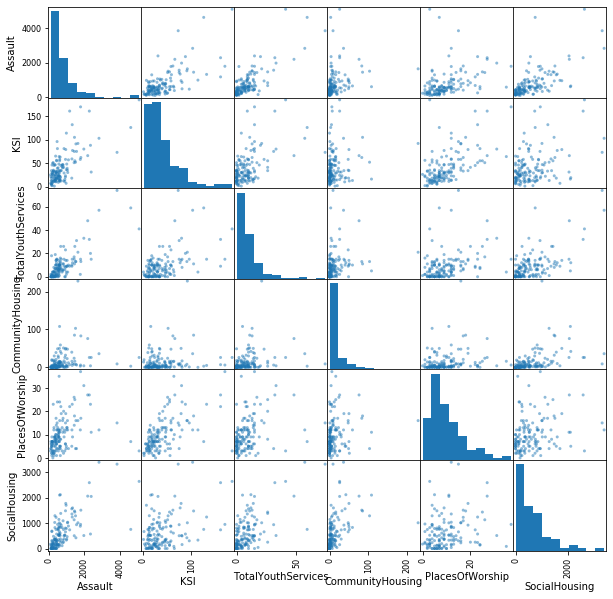

In [71]:
pd.plotting.scatter_matrix(assault_scatter, figsize=(10,10))

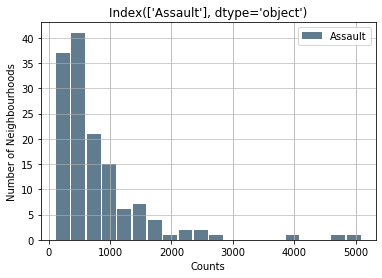

In [56]:
data.iloc[:,[11]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(data.iloc[:,[11]].columns)
plt.xlabel('Counts')
plt.ylabel('Number of Neighbourhoods')
plt.grid(axis='y', alpha=0.75)

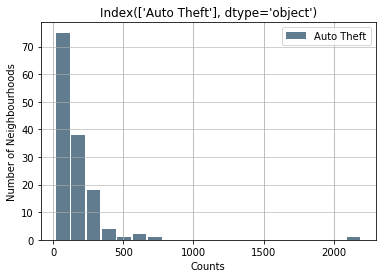

In [57]:
data.iloc[:,[12]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(data.iloc[:,[12]].columns)
plt.xlabel('Counts')
plt.ylabel('Number of Neighbourhoods')
plt.grid(axis='y', alpha=0.75)

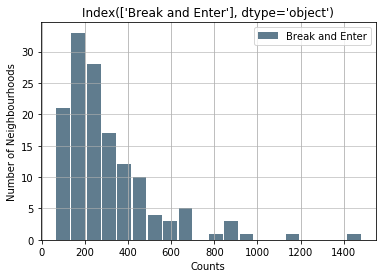

In [58]:
data.iloc[:,[13]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(data.iloc[:,[13]].columns)
plt.xlabel('Counts')
plt.ylabel('Number of Neighbourhoods')
plt.grid(axis='y', alpha=0.75)

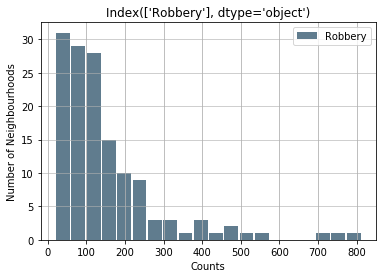

In [59]:
data.iloc[:,[14]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(data.iloc[:,[14]].columns)
plt.xlabel('Counts')
plt.ylabel('Number of Neighbourhoods')
plt.grid(axis='y', alpha=0.75)

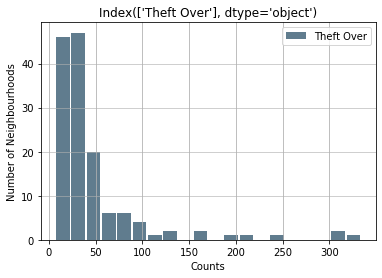

In [60]:
data.iloc[:,[15]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(data.iloc[:,[15]].columns)
plt.xlabel('Counts')
plt.ylabel('Number of Neighbourhoods')
plt.grid(axis='y', alpha=0.75)

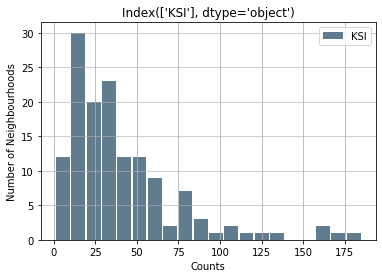

In [236]:
data.iloc[:,[16]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(data.iloc[:,[16]].columns)
plt.xlabel('Counts')
plt.ylabel('Number of Neighbourhoods')
plt.grid(axis='y', alpha=0.75)

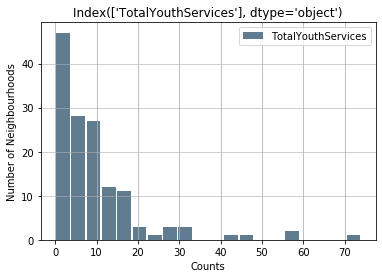

In [237]:
data.iloc[:,[17]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(data.iloc[:,[17]].columns)
plt.xlabel('Counts')
plt.ylabel('Number of Neighbourhoods')
plt.grid(axis='y', alpha=0.75)

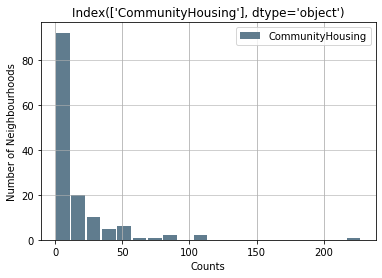

In [238]:
data.iloc[:,[18]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(data.iloc[:,[18]].columns)
plt.xlabel('Counts')
plt.ylabel('Number of Neighbourhoods')
plt.grid(axis='y', alpha=0.75)

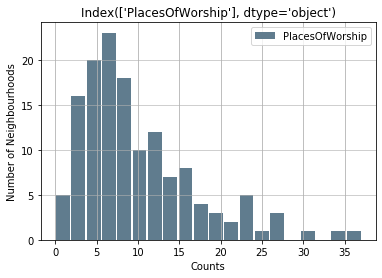

In [239]:
data.iloc[:,[19]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(data.iloc[:,[19]].columns)
plt.xlabel('Counts')
plt.ylabel('Number of Neighbourhoods')
plt.grid(axis='y', alpha=0.75)

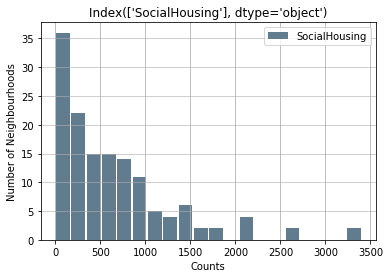

In [242]:
data.iloc[:,[20]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title(data.iloc[:,[20]].columns)
plt.xlabel('Counts')
plt.ylabel('Number of Neighbourhoods')
plt.grid(axis='y', alpha=0.75)

### Split data into training and test sets

In [12]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

In [22]:
X_train

,Population,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TPSFacilities_2km,TPSFacilities_5km,TPSFacilities_10km
70,11669,34,10,50,7,860,2,5,16
36,16936,13,1,2,4,664,1,1,8
112,17992,30,4,2,12,1036,0,2,11
78,7607,47,11,1,11,326,2,10,15
99,11817,17,15,0,6,0,1,3,18
...,...,...,...,...,...,...,...,...,...
91,14133,28,5,6,9,59,0,6,17
118,27917,161,9,7,22,736,1,5,9
67,11916,25,10,6,5,98,0,5,17
136,53485,161,32,26,27,2594,0,2,7


In [24]:
X_test.shape

(42, 9)

In [25]:
y_train

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
70,610,64,390,123,31
36,608,97,170,123,35
112,1077,283,303,247,26
78,794,52,409,147,48
99,453,54,168,117,28
...,...,...,...,...,...
91,506,69,170,145,22
118,1186,376,561,202,82
67,386,73,241,159,26
136,2292,276,628,501,82


## save test and train sets 

In [29]:
#pd.DataFrame(X_train).to_csv("2_Output/3_test_train_No_TOD/X_train.csv")
#pd.DataFrame(X_test).to_csv("2_Output/3_test_train_No_TOD/X_test.csv")
#pd.DataFrame(y_train).to_csv("2_Output/3_test_train_No_TOD/y_train.csv")
#pd.DataFrame(y_test).to_csv("2_Output/3_test_train_No_TOD/y_test.csv")

## Read Test and Train sets

In [4]:
X_train = pd.read_csv("2_Output/3_test_train_No_TOD/X_train.csv")
X_train = X_train.drop(['Unnamed: 0'], axis=1)
X_test = pd.read_csv("2_Output/3_test_train_No_TOD/X_test.csv")
X_test = X_test.drop(['Unnamed: 0'], axis=1)
y_train = pd.read_csv("2_Output/3_test_train_No_TOD/y_train.csv")
y_train = y_train.drop(['Unnamed: 0'], axis=1)
y_test = pd.read_csv("2_Output/3_test_train_No_TOD/y_test.csv")
y_test = y_test.drop(['Unnamed: 0'], axis=1)

In [5]:
X_train.head()


,Population,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TPSFacilities_2km,TPSFacilities_5km,TPSFacilities_10km
0,11669,34,10,50,7,860,2,5,16
1,16936,13,1,2,4,664,1,1,8
2,17992,30,4,2,12,1036,0,2,11
3,7607,47,11,1,11,326,2,10,15
4,11817,17,15,0,6,0,1,3,18


In [45]:
X_test.head()


,Population,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TPSFacilities_2km,TPSFacilities_5km,TPSFacilities_10km
0,18675,11,0,0,11,528,1,3,11
1,11499,13,3,0,7,154,0,6,18
2,22372,16,5,108,11,2104,1,4,16
3,9233,35,0,0,3,182,0,2,16
4,9456,1,4,14,2,358,0,3,8


In [16]:
y_train.head()


,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,610,64,390,123,31
1,608,97,170,123,35
2,1077,283,303,247,26
3,794,52,409,147,48
4,453,54,168,117,28


In [17]:
y_test.head()

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,909,99,239,121,38
1,391,32,106,56,7
2,619,171,275,138,36
3,275,25,116,46,14
4,325,113,63,81,9


In [86]:
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

##  Random Forest

In [6]:
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, \
explained_variance_score, r2_score,\
mean_squared_log_error, median_absolute_error, mean_poisson_deviance,\
mean_gamma_deviance, max_error,\
accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import statsmodels.api as sm

## Removed Population, Time of Day and TPS Facilities

In [7]:
X_train_3 = X_train.iloc[:,[1,2,3,4,5]]
X_train_3

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing
0,34,10,50,7,860
1,13,1,2,4,664
2,30,4,2,12,1036
3,47,11,1,11,326
4,17,15,0,6,0
...,...,...,...,...,...
93,28,5,6,9,59
94,161,9,7,22,736
95,25,10,6,5,98
96,161,32,26,27,2594


In [8]:
X_test_3 = X_test.iloc[:,[1,2,3,4,5]]
X_test_3.head()

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing
0,11,0,0,11,528
1,13,3,0,7,154
2,16,5,108,11,2104
3,35,0,0,3,182
4,1,4,14,2,358


### Iteration #3 Linear Regression - Population and TPS Facilities removed

In [91]:
assault_OLS_3 = OLS(X_train_3, y_train.iloc[:,[0]])

                            OLS Regression Results                            
Dep. Variable:                Assault   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     89.25
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           9.51e-34
Time:                        18:29:19   Log-Likelihood:                -714.41
No. Observations:                  98   AIC:                             1441.
Df Residuals:                      92   BIC:                             1456.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                147.4236     71

In [92]:
AutoTheft_OLS_3 = OLS(X_train_3, y_train.iloc[:,[1]])

                            OLS Regression Results                            
Dep. Variable:             Auto Theft   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     19.35
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           4.08e-13
Time:                        18:31:46   Log-Likelihood:                -642.01
No. Observations:                  98   AIC:                             1296.
Df Residuals:                      92   BIC:                             1312.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -54.5913     34

In [93]:
BreakEnter_OLS_3 = OLS(X_train_3, y_train.iloc[:,[2]])

                            OLS Regression Results                            
Dep. Variable:        Break and Enter   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     69.98
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           7.76e-30
Time:                        18:33:09   Log-Likelihood:                -594.53
No. Observations:                  98   AIC:                             1201.
Df Residuals:                      92   BIC:                             1217.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 98.3252     21

In [94]:
Robbery_OLS_3 = OLS(X_train_3, y_train.iloc[:,[3]])

                            OLS Regression Results                            
Dep. Variable:                Robbery   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     91.45
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           3.77e-34
Time:                        18:36:09   Log-Likelihood:                -544.21
No. Observations:                  98   AIC:                             1100.
Df Residuals:                      92   BIC:                             1116.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 17.0861     12

In [95]:
TheftOver_OLS_3 = OLS(X_train_3, y_train.iloc[:,[4]])

                            OLS Regression Results                            
Dep. Variable:             Theft Over   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     49.21
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.54e-24
Time:                        18:38:52   Log-Likelihood:                -479.82
No. Observations:                  98   AIC:                             971.6
Df Residuals:                      92   BIC:                             987.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.8347      6

## Iteration #3 - Random Forest Population and TPS Facilities removed

In [12]:
X_train_3

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing
0,34,10,50,7,860
1,13,1,2,4,664
2,30,4,2,12,1036
3,47,11,1,11,326
4,17,15,0,6,0
...,...,...,...,...,...
93,28,5,6,9,59
94,161,9,7,22,736
95,25,10,6,5,98
96,161,32,26,27,2594


In [117]:
X_test_3.head()

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing
0,11,0,0,11,528
1,13,3,0,7,154
2,16,5,108,11,2104
3,35,0,0,3,182
4,1,4,14,2,358


In [72]:
def rfr_model3 (X_train_3, y_train,y_test):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),\
        param_grid={ \
            'max_depth': range(3,7),\
            'n_estimators': (10, 15, 25, 50, 75, 100, 500, 1000),\
        },\
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X_train_3, y_train)
    best_params = grid_result.best_params_
    print('Best Parameters', best_params)
    
    # Instatiate random forsest regressor using results from grid search
    rfr=RandomForestRegressor(max_depth=best_params["max_depth"],\
                                n_estimators=best_params["n_estimators"],\
                                random_state=False, verbose=False)
    # Fit model to data
    rfr.fit(X_train_3, y_train)
    
    # Predict values
    prediction = rfr.predict(X_test_3)
    #print('Predictions', prediction)
    
    # Obtain Mean Absolute Error
    mae = mean_absolute_error(y_test, prediction)
    print('Mean Absolute Error', mae)
    
    mse_test = mean_squared_error(y_test, prediction)
    print('Mean Squared Error', mse_test)
    
    # Suppress scientific notation in NumPy when creating array
    np.set_printoptions(suppress=True)
    
    # Obtain Feature Importance
    importances = rfr.feature_importances_
    
    features = list(X_test_3.columns)
    
    print('Feature Importance Coeff:', (features, importances))
    
    # Feature Importance chart
    feat_importances = pd.Series(rfr.feature_importances_, index=X_test_3.columns)
    feat_importances.nlargest(20).plot(kind='barh')
  
    
    return rfr

Best Parameters {'max_depth': 4, 'n_estimators': 25}
Mean Absolute Error 259.29829957335414
Mean Squared Error 113180.3699114763
Feature Importance Coeff: (['KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing'], array([0.21647607, 0.59838733, 0.01551451, 0.0383252 , 0.13129689]))


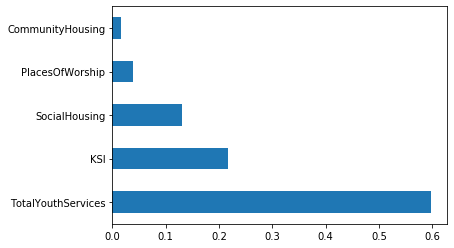

In [128]:
Assaults = rfr_model3(X_train_3,\
                          np.ravel(y_train.iloc[:,[0]]),\
                         y_test.iloc[:,[0]])

Best Parameters {'max_depth': 3, 'n_estimators': 15}
Mean Absolute Error 98.4399822106044
Mean Squared Error 40341.69353158205
Feature Importance Coeff: (['KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing'], array([0.26459059, 0.02155124, 0.02943024, 0.66981182, 0.0146161 ]))


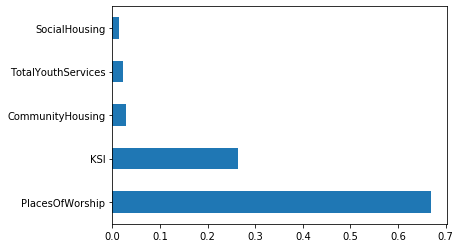

In [127]:
AutoTheft = rfr_model3(X_train_3,\
                          np.ravel(y_train.iloc[:,[1]]),\
                         y_test.iloc[:,[1]])

Best Parameters {'max_depth': 4, 'n_estimators': 25}
Mean Absolute Error 104.77306354482577
Mean Squared Error 18458.815621732258
Feature Importance Coeff: (['KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing'], array([0.63311548, 0.21541352, 0.01220068, 0.08419214, 0.05507818]))


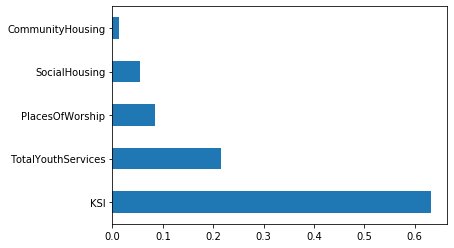

In [129]:
BreakEnter = rfr_model3(X_train_3,\
                          np.ravel(y_train.iloc[:,[2]]),\
                         y_test.iloc[:,[2]])

Best Parameters {'max_depth': 4, 'n_estimators': 15}
Mean Absolute Error 59.72880822740243
Mean Squared Error 6671.896783579392
Feature Importance Coeff: (['KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing'], array([0.2968859 , 0.56111058, 0.02098564, 0.02165514, 0.09936274]))


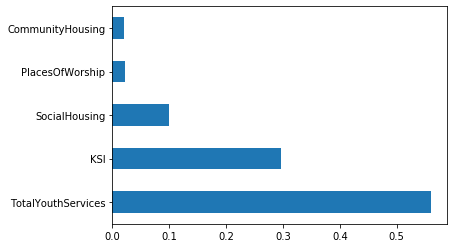

In [130]:
Robbery = rfr_model3(X_train_3,\
                          np.ravel(y_train.iloc[:,[3]]),\
                         y_test.iloc[:,[3]])

Best Parameters {'max_depth': 5, 'n_estimators': 50}
Mean Absolute Error 16.03773243129054
Mean Squared Error 534.5694682438175
Feature Importance Coeff: (['KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing'], array([0.61177027, 0.21843883, 0.04726386, 0.07795872, 0.04456832]))


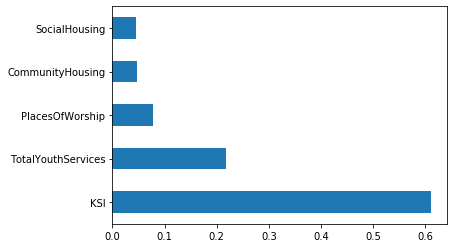

In [73]:
TheftOver = rfr_model3(X_train_3,\
                          np.ravel(y_train.iloc[:,[4]]),\
                         y_test.iloc[:,[4]])

In [13]:
from sklearn.ensemble import RandomForestRegressor as rfr

#CROSS VALIDATION

In [65]:
y_train.head()

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,610,64,390,123,31
1,608,97,170,123,35
2,1077,283,303,247,26
3,794,52,409,147,48
4,453,54,168,117,28


In [17]:
from sklearn.model_selection import KFold, RepeatedKFold, cross_validate

# FINAL RF MODEL

In [18]:
def rfr_model_err3 (X_train_3, y_train,y_test):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),\
        param_grid={ \
            'max_depth': range(3,7),\
            'n_estimators': (10, 15, 25, 50, 75, 100, 500, 1000),\
        },\
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X_train_3, y_train)
    best_params = grid_result.best_params_
    print('Best Parameters', best_params)
    print("---------------------------------------------------------")
    
    # Instatiate random forsest regressor using results from grid search
    rfr=RandomForestRegressor(max_depth=best_params["max_depth"],\
                                n_estimators=best_params["n_estimators"],\
                                random_state=False, verbose=False)
    # Fit model to data
    rfr.fit(X_train_3, y_train)
    
    # Predict values
    prediction = rfr.predict(X_test_3)
    print('Predictions', prediction)
    print("---------------------------------------------------------")
    
    diff = (y_test - prediction)
    print("Errors",diff)
    
    #pd.DataFrame(diff).to_csv("2_Output/4_mse/TheftOver_errors2.csv")
    
    print("---------------------------------------------------------")
    
    # identify outliers with interquartile range
    data = diff
    
    # Plot histogram and adjust style
    plt.hist(diff, edgecolor='black', linewidth=1.2)
    plt.title("Errors Histogram")
    plt.ylabel('Number of Neighbourhoods')
    plt.xlabel('y-y^')
    
    # calculate interquartile range
    q25, q75 = percentile(data, 25), percentile(data, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in data if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    
    print("---------------------------------------------------------")
    
    # Obtain Mean Absolute Error
    mae = mean_absolute_error(y_test, prediction)
    print('Mean Absolute Error', mae)
    
    mse_test = mean_squared_error(y_test, prediction)
    print('Mean Squared Error', mse_test)
    
    #r2_ = r2_score(y_test, prediction)
    #print("R-squared:",r2_)
    
    print("---------------------------------------------------------")
    
    # Suppress scientific notation in NumPy when creating array
    np.set_printoptions(suppress=True)
    
    # Obtain Feature Importance
    importances = rfr.feature_importances_
    
    features = list(X_test_3.columns)
    
    print('Feature Importance Coeff:', (features, importances))
    
    print("---------------------------------------------------------")
    
    # Feature Importance chart
    feat_importances = pd.Series(rfr.feature_importances_, index=X_test_3.columns)
    #feat_importances.nlargest(20).plot(kind='barh')
    features = ['KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing']
    plt.figure(figsize=(10,5))
    plt.bar(features, feat_importances)
    plt.title('Feature Importance')
    plt.ylabel('Coefficient')
    plt.xlabel('Feature')

    print("---------------------------------------------------------")
    
    ## Perform K-Fold CV
    ## Try using cross_val_score
    #scores=cross_val_score(rfr, X_train_3, y_train.ravel(),\
                       #cv=10, \
                       #scoring='neg_mean_absolute_error')
    #print('scores', scores)
    
    ## Try using make_scorer
    #scorer = make_scorer(mean_squared_error, greater_is_better=False)
    #cv_score = np.sqrt(-cross_val_score(estimator=rfr, X=X_train_3, y=y_train.ravel(), cv=10, scoring = scorer))
    #print('cv_scores', cv_score)
    
    #plt.figure(figsize=(10,5))
    #plt.bar(range(len(cv_score)), cv_score)
    #plt.title('Cross Validation Score')
    #plt.ylabel('RMSE')
    #plt.xlabel('Iteration')

    #plt.plot(range(len(cv_score) + 1), [cv_score.mean()] * (len(cv_score) + 1))
    #plt.tight_layout()
    
      ## Try variance scores
    #yt = [i for i in y_train]
    #scores_rfr = cross_val_score(rfr,X_train_3,yt,cv=10,scoring='explained_variance')
    #print('explained variance scores for k=10 fold validation:',scores_rfr)
    #print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
    
    #print("---------------------------------------------------------")
    
    # KFold cross_validate
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
    # Kfold CV
    kf = KFold(n_splits=10, shuffle=True, random_state=24)
    cval_score = cross_validate(rfr,X_train_3, y_train, cv=kf,\
                                scoring = ('r2','neg_mean_squared_error'),\
                                return_train_score=True)
    print('kfold CV neg MSE', cval_score['test_neg_mean_squared_error'])
    print('kFold R^2',cval_score['train_r2'])
    print('10-KFold folds:',kf)
    
        #################
    plt.figure(figsize=(10,5))
    plt.bar(range(len(cval_score['test_neg_mean_squared_error'])), cval_score['test_neg_mean_squared_error'])
    plt.title('10-Fold Cross Validation Score')
    plt.ylabel('neg_MSE')
    plt.xlabel('Iteration')

    plt.plot(range(len(cval_score['test_neg_mean_squared_error']) + 1), \
             [cval_score['test_neg_mean_squared_error'].mean()] * (len(cval_score['test_neg_mean_squared_error']) + 1))
    plt.tight_layout()
    
    print("---------------------------------------------------------")
    
    kf5 = KFold(n_splits=5, shuffle=True, random_state=24)
    cval_score5 = cross_validate(rfr,X_train_3, y_train, cv=kf5,\
                                scoring = ('r2','neg_mean_squared_error'),\
                                return_train_score=True)
    print('kfold CV neg MSE', cval_score5['test_neg_mean_squared_error'])
    print('kFold R^2',cval_score5['train_r2'])
    print('5-Fold folds:',kf5)
    
        #################
    plt.figure(figsize=(10,5))
    plt.bar(range(len(cval_score5['test_neg_mean_squared_error'])), cval_score5['test_neg_mean_squared_error'])
    plt.title('5-Fold Cross Validation Score')
    plt.ylabel('neg_MSE')
    plt.xlabel('Iteration')

    plt.plot(range(len(cval_score5['test_neg_mean_squared_error']) + 1), \
             [cval_score5['test_neg_mean_squared_error'].mean()] * (len(cval_score5['test_neg_mean_squared_error']) + 1))
    plt.tight_layout()
    
    print("---------------------------------------------------------")
    
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, prediction, s=20)
    plt.title('Predicted vs. Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
    #p1 = max(max(prediction), max(y_test)) #test
    #p2 = min(min(prediction), min(y_test))  #test
    #plt.plot([p1, p2], [p1, p2], 'b-') #test
    
    plt.tight_layout()
    
    return rfr

In [42]:
X_train_3

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing
0,34,10,50,7,860
1,13,1,2,4,664
2,30,4,2,12,1036
3,47,11,1,11,326
4,17,15,0,6,0
...,...,...,...,...,...
93,28,5,6,9,59
94,161,9,7,22,736
95,25,10,6,5,98
96,161,32,26,27,2594


Best Parameters {'max_depth': 4, 'n_estimators': 50}
---------------------------------------------------------
Predictions [ 536.75987685  346.61722557 1144.76918482  273.27572749  522.21588013
 1172.59771973  505.69793449  462.77712765  799.12745697 1086.49866154
  525.14504671 1164.98548096  616.74315843  753.40405583  579.37419441
  622.67160546  596.78823143  882.91934389  763.8736922   714.56678408
  608.53669049 1192.69235951  613.73483093  540.59853218  565.98554104
  273.80464416  590.35008551  609.88813807  279.95350505 1338.7627903
  555.22804882  646.17060293  693.36149025 3187.51       2102.68955046
  262.38241005  256.17241837 1070.71420817  854.99912873  252.18503393
  617.17051455  351.06376169]
---------------------------------------------------------
Errors [ 372.24012315   44.38277443 -525.76918482    1.72427251 -197.21588013
  271.40228027  -48.69793449 -241.77712765 -422.12745697  350.50133846
 -293.14504671 -685.98548096 -257.74315843  198.59594417 -412.37419441
  

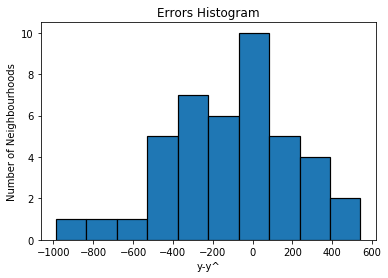

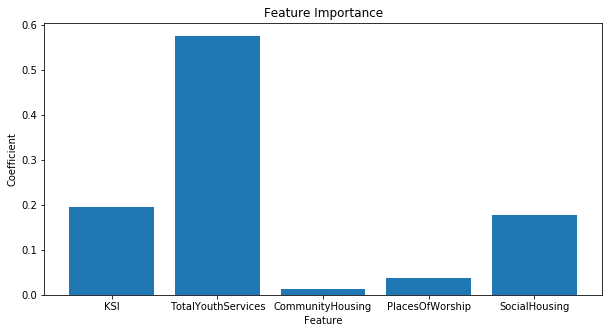

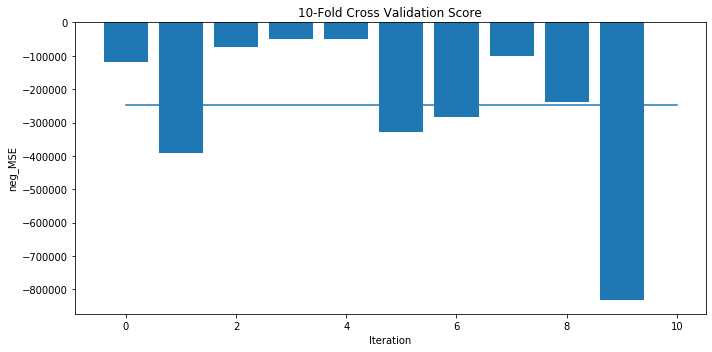

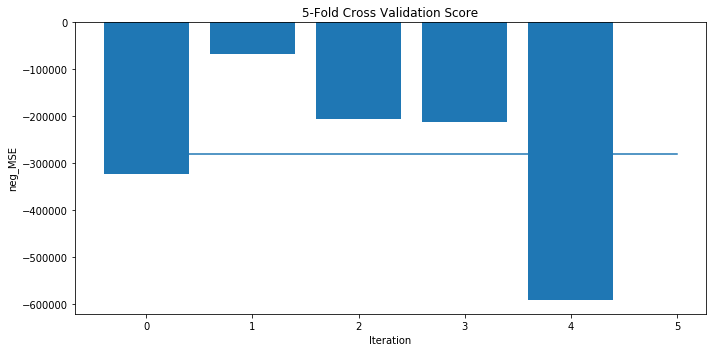

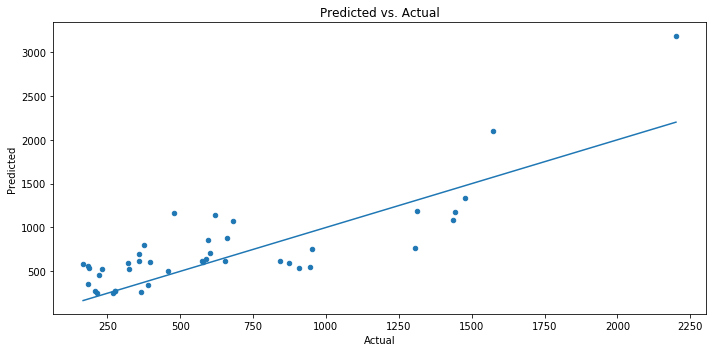

In [19]:
Assaults3 = rfr_model_err3(X_train_3,\
                          np.ravel(y_train.iloc[:,[0]]),\
                         np.ravel(y_test.iloc[:,[0]]))

Best Parameters {'max_depth': 4, 'n_estimators': 15}
---------------------------------------------------------
Predictions [ 500.83703718  342.70423617 1036.32305195  268.76611092  471.56016077
 1226.99539691  519.02709207  404.52275862  810.93804909 1107.13571495
  499.02509231 1180.54833981  584.03065342  690.63648676  549.37077113
  589.79886567  529.26019943  995.62805963  708.97345645  711.39082825
  565.69368373 1171.06934107  584.03065342  514.21839675  585.97096728
  258.03583314  560.25435292  664.33728438  294.29824125 1191.03259148
  537.81363484  596.68783722  688.46131883 3271.63333333 2016.87125023
  275.22900243  243.52535695 1052.53541423 1054.66272204  246.3721102
  571.46189598  325.92187761]
---------------------------------------------------------
Errors [  408.16296282    48.29576383  -417.32305195     6.23388908
  -146.56016077   217.00460309   -62.02709207  -183.52275862
  -433.93804909   329.86428505  -267.02509231  -701.54833981
  -225.03065342   261.36351324  

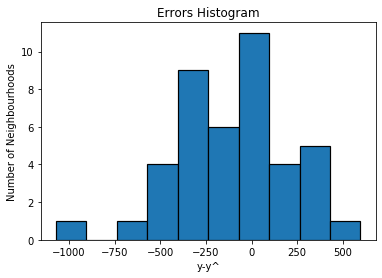

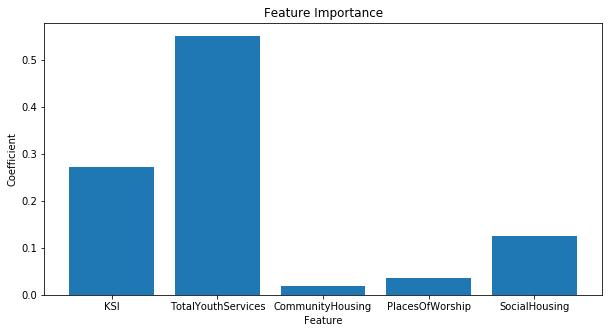

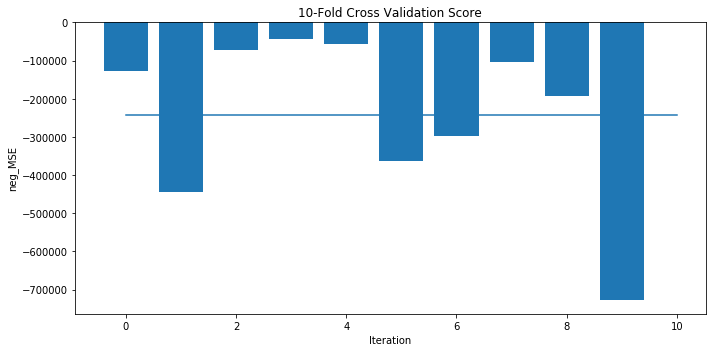

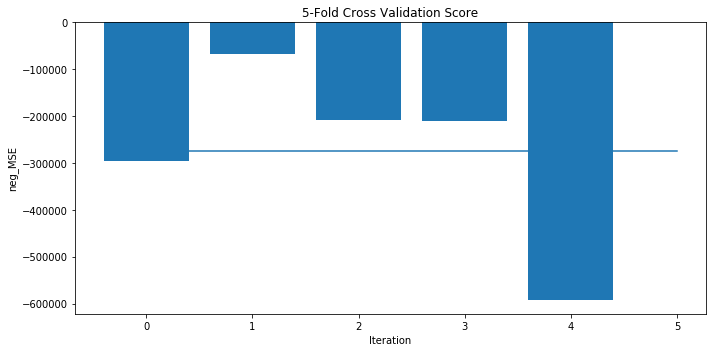

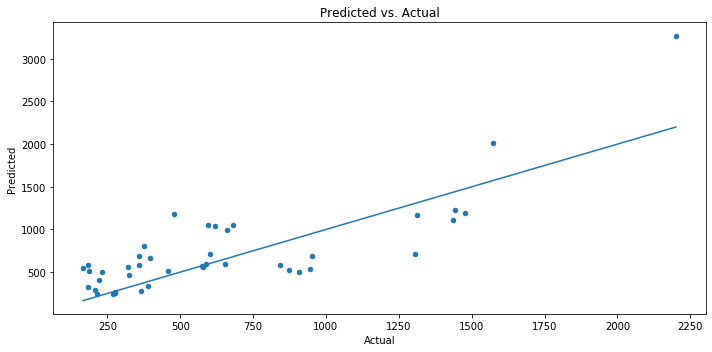

In [52]:
Assaults3 = rfr_model_err3(X_train_3,\
                          np.ravel(y_train.iloc[:,[0]]),\
                         np.ravel(y_test.iloc[:,[0]]))

Best Parameters {'max_depth': 6, 'n_estimators': 15}
---------------------------------------------------------
Predictions [ 128.39384615   87.58579295   88.41930331  139.32383418   77.73944056
  237.5778744   147.99845079  140.21910213  161.08200138  449.33333333
  138.84924444  211.97311249   86.51888817  102.86515961   88.6872177
   76.41632629  119.42120763  122.26281979   92.79026187  148.86056457
   90.61603103  179.84598887   67.24567694  186.8997601    85.10408425
  147.52383418  131.88455186  159.26111935   62.77019662  450.1
  127.1182425   114.79169472  150.15575092  396.6         208.63861514
  104.17275062  145.08573894  125.87357143 1244.          116.06232198
   62.73854851   75.68130773]
---------------------------------------------------------
Errors [  -29.39384615   -55.58579295    82.58069669  -114.32383418
    35.26055944    44.4221256    -25.99845079   -99.21910213
   -29.08200138  -257.33333333    11.15075556   -80.97311249
   -28.51888817   -17.86515961   -36.68

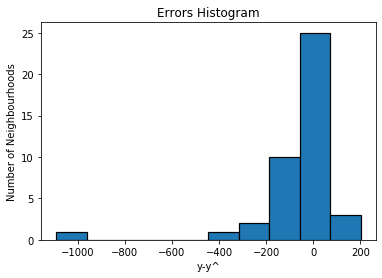

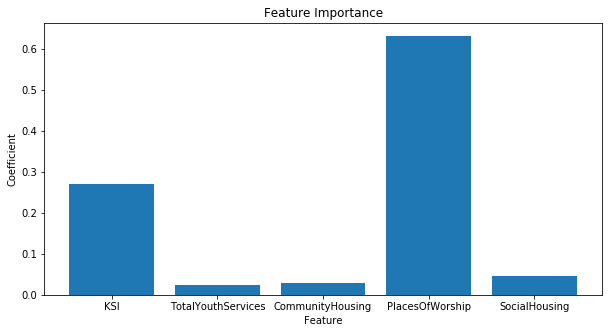

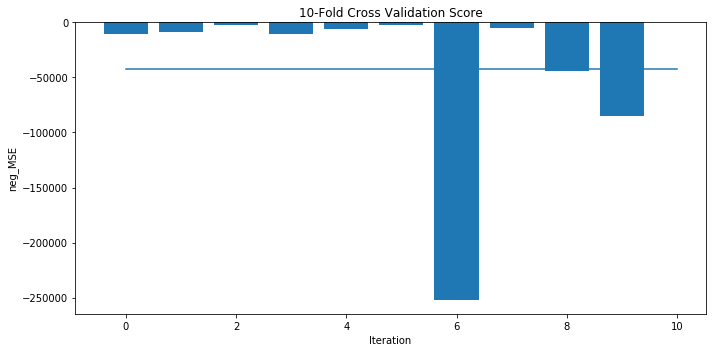

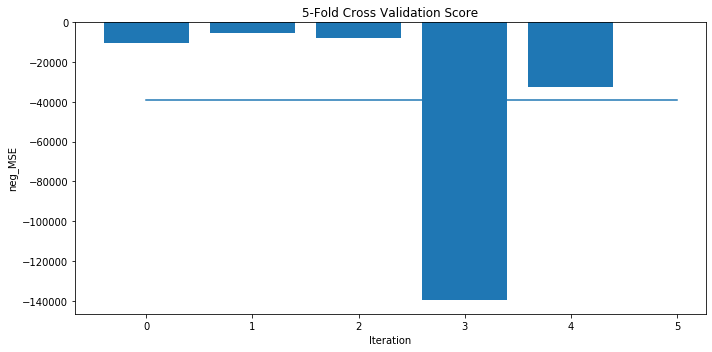

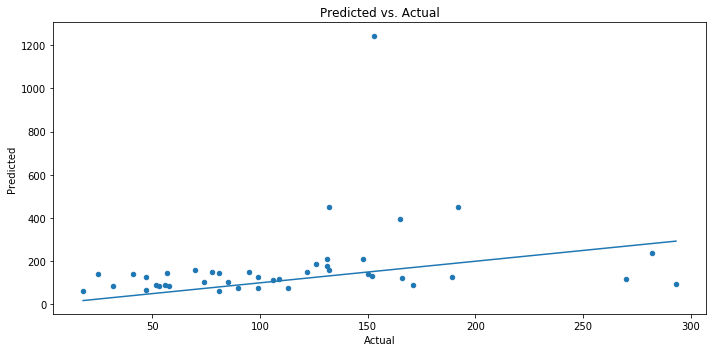

In [20]:
AUtoTheft3 = rfr_model_err3(X_train_3,\
                          np.ravel(y_train.iloc[:,[1]]),\
                         np.ravel(y_test.iloc[:,[1]]))

Best Parameters {'max_depth': 6, 'n_estimators': 100}
---------------------------------------------------------
Predictions [238.94877768 170.98277176 274.84221654 276.25662362 129.55071456
 456.18933363 305.54842774 236.22843659 337.44415209 420.26249012
 287.82062778 490.8374026  187.6343501  260.69242422 139.7059541
 179.60260272 175.88610652 167.62843776 260.30999544 248.4412159
 171.21847058 334.97530335 153.42764963 181.8508851  130.25271456
 264.35759657 267.04209183 321.34909323 154.88561156 386.08683353
 196.89081262 267.51858373 206.66028311 612.83083333 491.54379804
 162.89729496 260.31576199 318.42889958 365.1796773  159.77605172
 178.16603643 187.80092503]
---------------------------------------------------------
Errors [   0.05122232  -64.98277176    0.15778346 -160.25662362  -66.55071456
  -77.18933363  -68.54842774  -79.22843659 -217.44415209  216.73750988
   51.17937222  -52.8374026   -89.6343501   110.30757578  153.2940459
  109.39739728  170.11389348  103.37156224  -

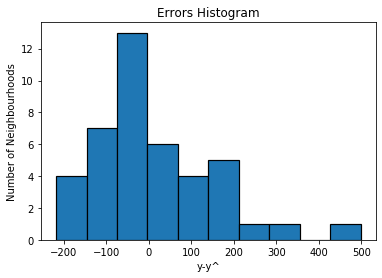

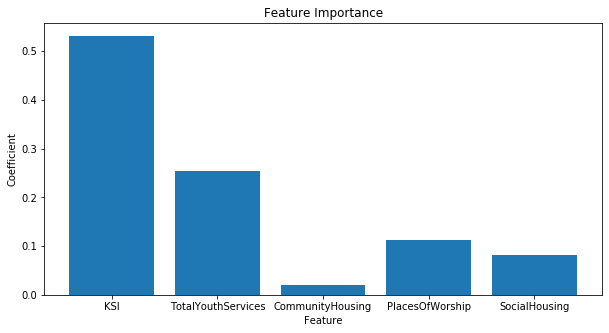

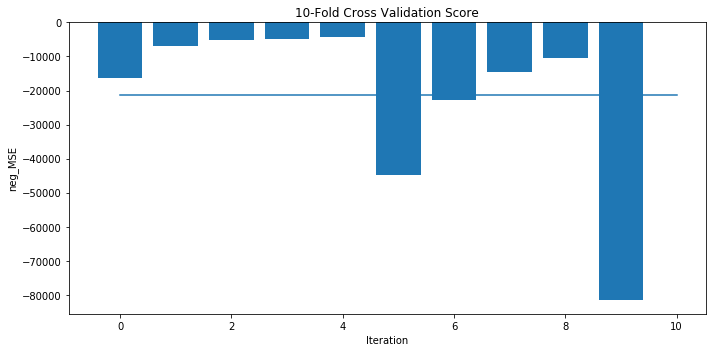

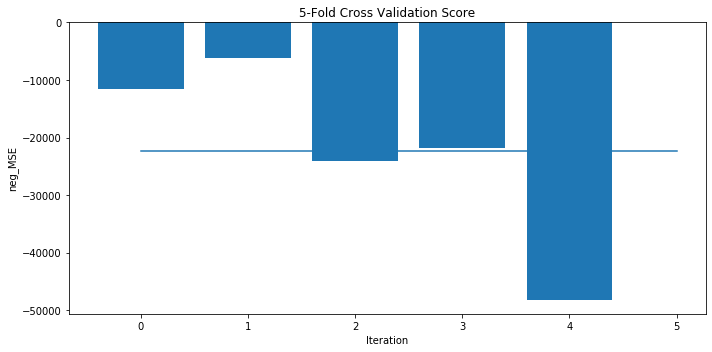

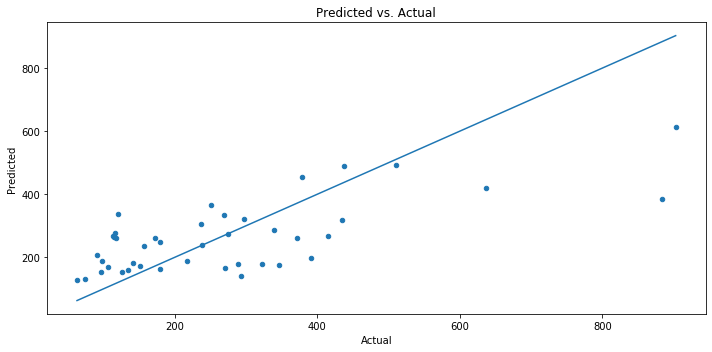

In [56]:
BreakandEnter3 = rfr_model_err3(X_train_3,\
                          np.ravel(y_train.iloc[:,[2]]),\
                         np.ravel(y_test.iloc[:,[2]]))

Best Parameters {'max_depth': 5, 'n_estimators': 10}
---------------------------------------------------------
Predictions [ 77.75003528  85.12592327 166.43603656  73.34964224  91.49582653
 232.59185606 167.33638655 117.42491317 186.17127976 249.84450397
 112.72380952 247.05013889 107.05616156 147.06148479  93.27505556
 104.02181812  98.58218849  97.50679167 140.65749489 118.58848479
  95.15252349 196.00067227  94.0594516   99.13948864  91.95886574
  51.5958098  104.77655668 137.36904762  50.81202192 230.03547619
 105.93994318 138.26626257 147.56119859 571.65       386.65333333
  64.87126435  51.5958098  159.07407738 235.01821429  70.80785309
 128.17806812  75.11529844]
---------------------------------------------------------
Errors [  43.24996472  -29.12592327  -28.43603656  -27.34964224  -10.49582653
  127.40814394 -114.33638655  -85.42491317  -51.17127976   56.15549603
  -54.72380952 -157.05013889  -33.05616156   67.93851521  -73.27505556
   38.97818188   33.41781151  -10.50679167 

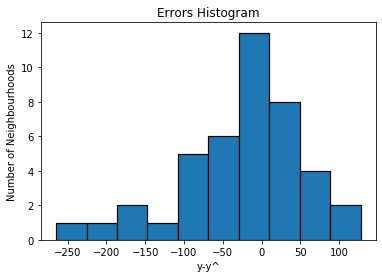

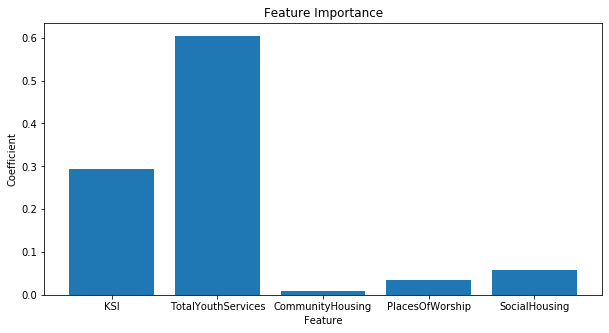

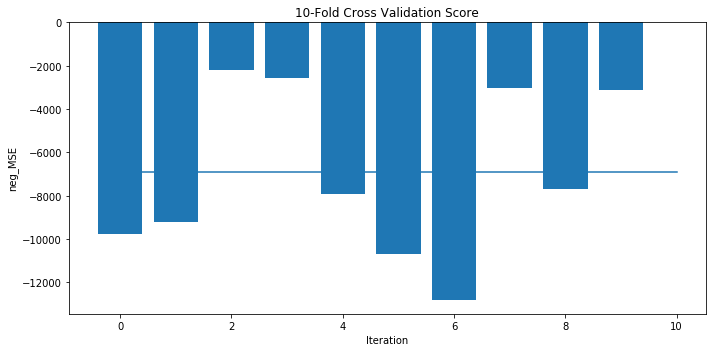

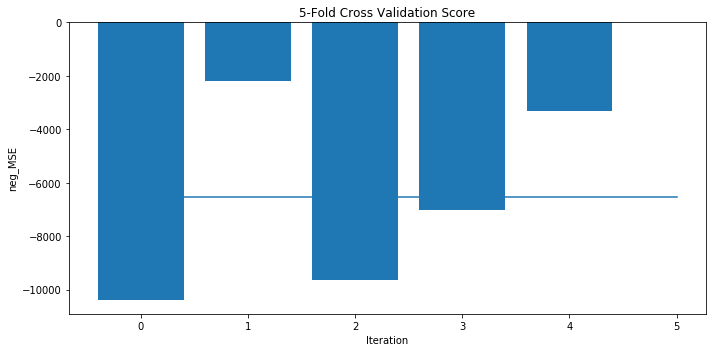

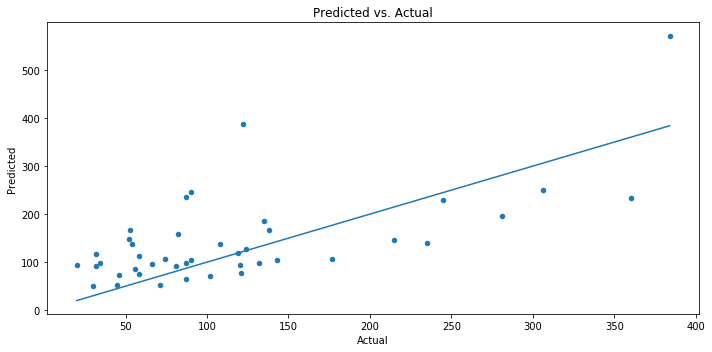

In [58]:
Robbery3 = rfr_model_err3(X_train_3,\
                          np.ravel(y_train.iloc[:,[3]]),\
                         np.ravel(y_test.iloc[:,[3]]))

Best Parameters {'max_depth': 6, 'n_estimators': 25}
---------------------------------------------------------
Predictions [ 30.26464293  22.46785354  32.56618949  21.63864899  14.99944301
  92.19341796  37.53030665  27.0591214   38.72877571  77.38148485
  35.0600467  118.05690476  16.99359791  24.07934677  26.31632831
  23.38928876  25.75712808  21.14667208  26.57638067  34.43151201
  20.21389326  62.67633282  16.68226229  23.10587739  14.86956066
  23.28261868  24.72762752  53.76591235  16.14249867  96.69848485
  22.28218016  27.50902887  22.51841371 142.38666667 135.34073504
  22.69479138  23.28261868  31.78086462 104.68266667  23.2948543
  20.6426752   20.02212891]
---------------------------------------------------------
Errors [  7.73535707 -15.46785354   3.43381051  -7.63864899  -5.99944301
 -19.19341796  12.46969335  -1.0591214  -19.72877571 -21.38148485
 -14.0600467  -58.05690476  -1.99359791   2.92065323  -1.31632831
   0.61071124  34.24287192   5.85332792  27.42361933 -19.43

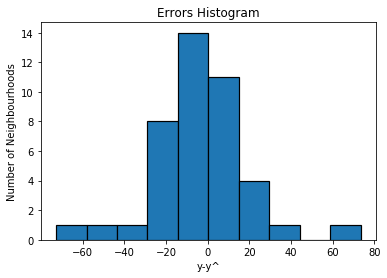

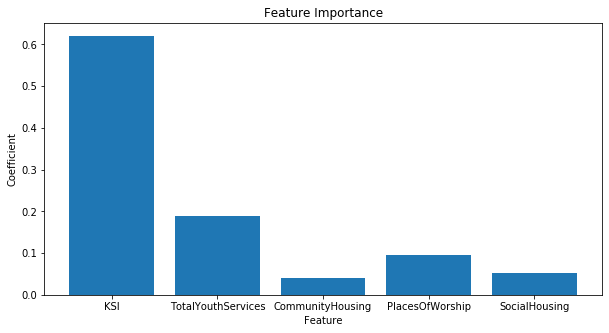

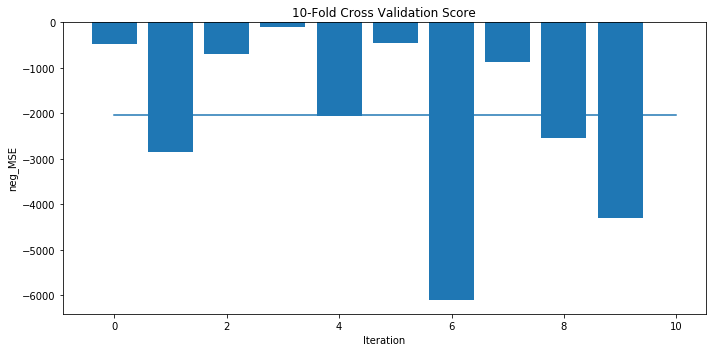

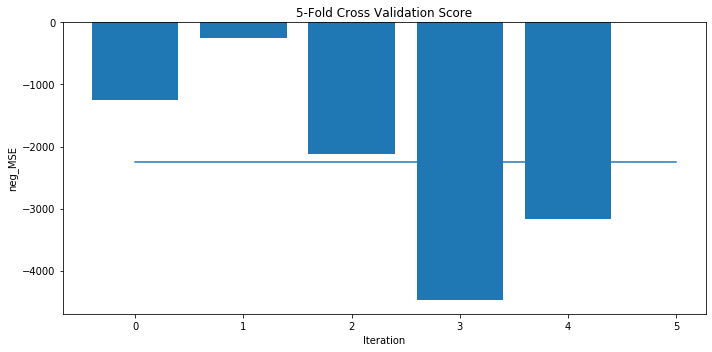

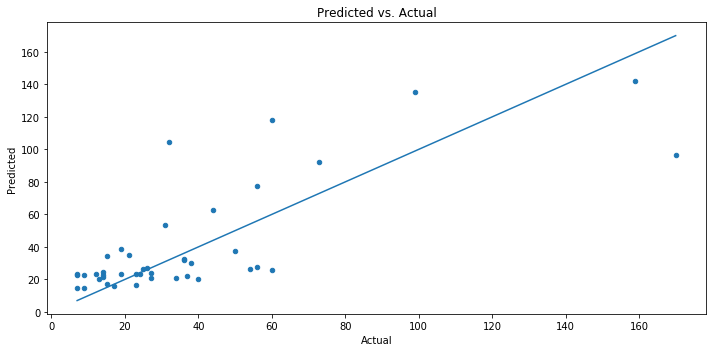

In [60]:
TheftOver3 = rfr_model_err3(X_train_3,\
                          np.ravel(y_train.iloc[:,[4]]),\
                         np.ravel(y_test.iloc[:,[4]]))